In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# in this practical we have given some input features like gre score , tofel score 
#and our task is use this features to see if the student has a chance to get admitted in a collage or not 
#now here a small problem is that the target varibale which is chance to admit column 
#has values in 0-1 but as we are doing classification we want it in 0 and 1 
#so first we will make the chnage , here we are considering that if the chance of admit 
#is greater than 0.75 then make it 1 , if less than 0.75 make it 0 
# for this we will use binirizer , it will make value 0 and 1 based on the threshsold we will give 

In [8]:
#lets import the binirizer class 
from sklearn.preprocessing import Binarizer
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
bn = Binarizer(threshold=0.75)
df['Chance of Admit ']=bn.fit_transform(df[['Chance of Admit ']])

In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [12]:
#now lets make input and output variable 
x = df.drop('Chance of Admit ' , axis=1) # axis one tell the model that this is a column 
y = df['Chance of Admit ']

In [13]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [14]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [15]:
# now lets convert our chnace of admit column values which are in float to int 
y = y.astype('int')

In [16]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [20]:
# we can count the number of 0 and 1 
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [21]:
# cross validation 
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0 , test_size=0.25)

In [24]:
x_train.shape

(300, 8)

In [25]:
y_train.shape

(300,)

In [26]:
x_test.shape

(100, 8)

In [28]:
#lest train the model so we will import , the classifier first
from sklearn.tree import DecisionTreeClassifier

In [29]:
#now lets make a object of this classs
classifier = DecisionTreeClassifier(random_state=0)

In [30]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_pred = classifier.predict(x_test)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

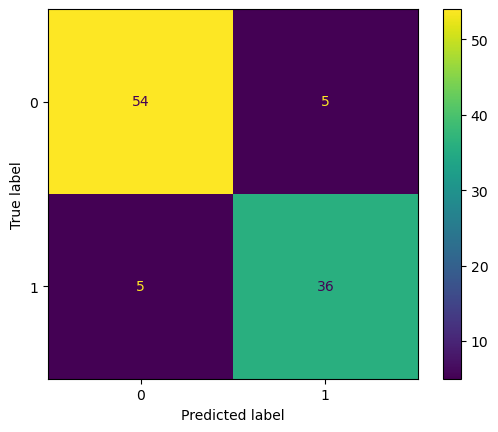

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [37]:
from sklearn.metrics import classification_report